In [179]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [180]:
#Data preperation

In [181]:
data = [[[(i+j)/100]for i in range(5)] for j in range(100)]
target = [(i+5)/100 for i in range(100)]

#here normalized the data by dividing by 100,otherwise it difficult to learn the data by model

In [182]:
data = np.array(data,dtype=float)
target = np.array(target,dtype=float)


In [183]:
data.shape

(100, 5, 1)

In [184]:
target.shape

(100,)

In [185]:
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.2,random_state=4)

In [186]:
#RNN model

In [187]:
model = Sequential()

In [189]:

model.add(LSTM((1),batch_input_shape=(None,None,1),return_sequences=True))
model.add(LSTM((1),return_sequences=False))

In [190]:
model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])

In [191]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_23 (LSTM)              (None, None, 1)           12        
                                                                 
 lstm_25 (LSTM)              (None, None, 1)           12        
                                                                 
 lstm_26 (LSTM)              (None, 1)                 12        
                                                                 
Total params: 36 (144.00 Byte)
Trainable params: 36 (144.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [192]:
history = model.fit(x_train,y_train,epochs=400,validation_data=(x_test,y_test))

Epoch 1/400
3/3 [==============================] - 2s 153ms/step - loss: 0.5688 - accuracy: 0.0000e+00 - val_loss: 0.4576 - val_accuracy: 0.0000e+00
Epoch 2/400
3/3 [==============================] - 0s 7ms/step - loss: 0.5669 - accuracy: 0.0000e+00 - val_loss: 0.4558 - val_accuracy: 0.0000e+00
Epoch 3/400
3/3 [==============================] - 0s 8ms/step - loss: 0.5651 - accuracy: 0.0000e+00 - val_loss: 0.4539 - val_accuracy: 0.0000e+00
Epoch 4/400
3/3 [==============================] - 0s 7ms/step - loss: 0.5633 - accuracy: 0.0000e+00 - val_loss: 0.4521 - val_accuracy: 0.0000e+00
Epoch 5/400
3/3 [==============================] - 0s 19ms/step - loss: 0.5614 - accuracy: 0.0000e+00 - val_loss: 0.4503 - val_accuracy: 0.0000e+00
Epoch 6/400
3/3 [==============================] - 0s 7ms/step - loss: 0.5596 - accuracy: 0.0000e+00 - val_loss: 0.4485 - val_accuracy: 0.0000e+00
Epoch 7/400
3/3 [==============================] - 0s 7ms/step - loss: 0.5577 - accuracy: 0.0000e+00 - val_loss: 0.

In [193]:
results = model.predict(x_test)

1/1 [==============================] - 0s 295ms/step


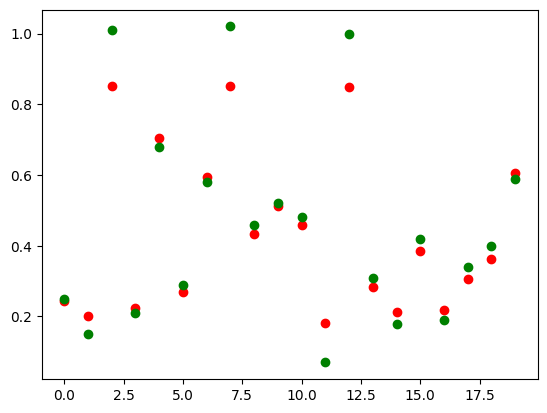

In [194]:
plt.scatter(range(20),results,c='r')
plt.scatter(range(20),y_test,c='g')
plt.show()

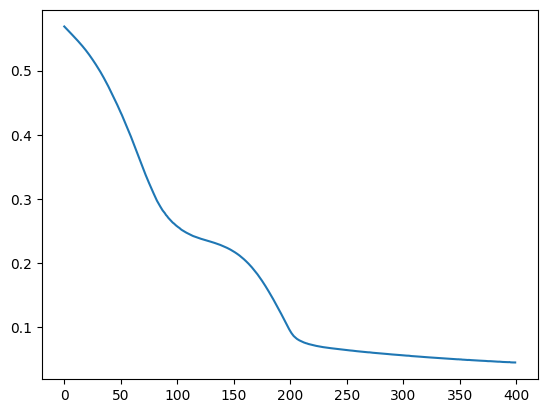

In [195]:
plt.plot(history.history['loss'])
plt.show()

In [196]:
#NOTE: as the plot show the loss function is still decreasing , am changingin epochs from 50 to 100 then to 500
#then added a layer to make better ,as to bring the loos function straight or increase.
#also we can see the scatter plot changes while changin epochs aswell as adding layer as the model was the process of learning and it comes closer points.